<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

**TABLE OF CONTENTS**

* [1.Logistic Regresion](#Logistic-Regresion)  
* [2.Support Vector Machine](#Support-Vector-Machine)  
* [3.Rabdom Forest](#Random-FOrest)  
* [4.XGBoost](#XGBOOST)  
* [5.Model Selection](#Model-Selection)  

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

In [76]:
pathfile = "../data/df_unido_definitivo.csv"
df = pd.read_csv(pathfile)
df.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
df.head()

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,tot_cur_bal,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mort_acc,num_bc_sats,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
0,-1.326914,1.171580,0.899589,0.899572,1.201397,1.645700,0.644953,0.496383,-0.070379,-0.019969,1.965091,0.631600,1.062875,-1.755238,-0.01813,0.064164,-0.606543,0.115178,1.480831,-0.02748,0.187468,-1.027527,2.060082,1.082338,0.365039,0,1.0,0,0,1,1,1,0,0
1,2.544662,-0.387948,-0.261267,-0.261266,-0.377537,-1.726333,-0.032885,0.078142,-0.070379,-0.019969,-0.865870,-0.712643,-0.640442,1.344034,-0.01813,-2.074282,0.095377,-0.846130,-0.588304,-0.02748,-1.629146,1.477403,-0.941155,-0.937646,-0.813058,0,0.0,1,0,0,1,0,0,1
2,-1.326914,0.520515,0.567916,0.567904,-0.377537,0.083051,0.583332,0.458361,-0.070379,-0.019969,0.888317,0.082905,3.599536,-1.235665,-0.01813,-1.544575,-0.606543,1.076486,2.515399,-0.02748,0.685012,-1.106423,1.036430,-0.081818,3.038599,0,1.0,0,0,1,1,0,0,0
3,0.591176,-0.357984,-0.095430,-0.095432,2.780331,-0.410418,-0.156128,0.002098,-0.070379,-0.001552,-0.831107,-0.783683,0.385105,-1.442768,-0.01813,0.064164,-0.415110,-0.846130,0.791119,-0.02748,0.685012,-1.340292,-0.787799,-0.823838,-0.082157,0,1.0,0,0,0,1,0,0,1
4,0.591176,-0.009422,-0.261267,-0.261266,-0.377537,-1.315109,0.151980,0.192208,-0.070379,-0.019969,-0.075423,1.171392,-0.622164,1.020664,-0.01813,-0.347830,-0.478921,-0.365476,-1.278016,-0.02748,-0.472067,1.477403,-0.001468,-0.469185,-0.841910,0,1.0,0,0,1,1,0,0,1


In [77]:
x = df.drop(['loan_status'], axis='columns').values
y = df['loan_status'].values

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [79]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Logistic Regresion

In [80]:
prediccion = pickle.load(open("../model/logistic_regresion","rb"))

In [81]:
regresion = prediccion.predict(x_test)

In [82]:
score_lr = accuracy_score(y_test,prediccion.predict(x_test))

In [83]:
score_lr

0.8958444518167

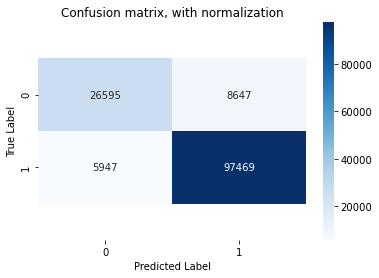

In [11]:
conf_matrix(y_test, regresion)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Support Vector Machine

In [12]:
SVM = pickle.load(open("../model/support_vector_machine","rb"))

In [14]:
support_vector = SVM.predict(x_test)

In [49]:
score_svm = accuracy_score(y_test,SVM.predict(x_test))

In [50]:
score_svm

0.720304634424267

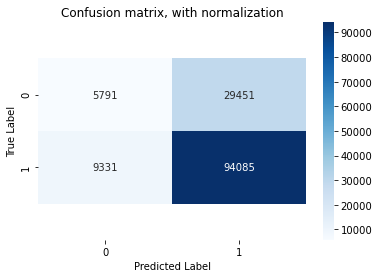

In [17]:
conf_matrix(y_test, support_vector)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Random Forest

In [18]:
RM = pickle.load(open("../model/random_forest","rb"))

In [20]:
random_forest = RM.predict(x_test)

In [51]:
score_rf = accuracy_score(y_test,RM.predict(x_test))

In [52]:
score_rf

0.8969478861659623

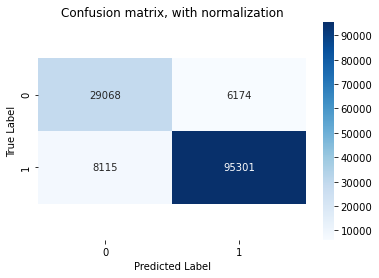

In [23]:
conf_matrix(y_test, random_forest)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# XGBOOST

In [24]:
XG = pickle.load(open("../model/xgboost","rb"))

In [26]:
xgboost = XG.predict(x_test)

In [53]:
score_xgb = accuracy_score(y_test,XG.predict(x_test))

In [54]:
score_xgb

0.9007990884045638

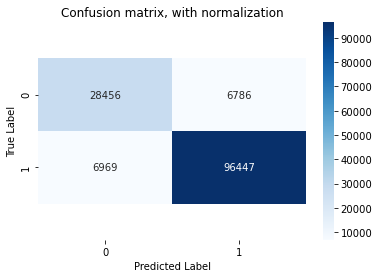

In [29]:
conf_matrix(y_test, xgboost)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Model Selection

In [74]:
data = {"modelo":["score_logistic","score_svm","scpre_random_forest","score_xgboost"],"Accuracy":[score_lr*100,score_svm*100,score_rf*100,score_xgb*100]}
df = pd.DataFrame(data)
orden = df.sort_values(by=["Accuracy"],ascending=False)
orden


,modelo,Accuracy
3,score_xgboost,90.079909
2,scpre_random_forest,89.694789
0,score_logistic,89.620842
1,score_svm,72.030463
